# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
import random
import torch
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [3]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [6]:
env_info = env.reset(train_mode=True)[brain_name] 
state = env_info.vector_observations[0]            
score = 0                                          
while True:
    
    action = np.random.randint(action_size)       
    env_info = env.step(action)[brain_name]       
    next_state = env_info.vector_observations[0]
    
    reward = env_info.rewards[0]                  
    done = env_info.local_done[0]
    
    score += reward                                
    state = next_state             
    
    if done:                                       
        break
    
print("Score: {}".format(score))

Score: 0.0


### 3. Initialize the agent

In [12]:
from dqn_agent import Agent
from model import QNetwork, DuelingQNetwork

agent = Agent(state_size=state_size, action_size=action_size, qnetwork=QNetwork, update_type='dqn', seed=0)


### 4. Train the model

In [13]:
def dqn(n_episodes, max_t, eps_start, eps_end, eps_decay):
    """
    Deep Q-learning
    
    Params
    ======
        n_episodes (int): number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy policy 
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) to decrease epsilon
    """
    
    scores = []                                                             
    scores_window = deque(maxlen=100)                         
    eps = eps_start                                           
    
    for i_episode in range(1, n_episodes + 1):                
        env_info = env.reset(train_mode=True)[brain_name]     
        state = env_info.vector_observations[0]               
        score = 0                                             
        
        for t in range(max_t):                                 
            action = agent.act(state, eps)                    
            env_info = env.step(action)[brain_name] 
            next_state = env_info.vector_observations[0]      
            reward = env_info.rewards[0]                      
            done = env_info.local_done[0]                     
            
            agent.step(state, action, reward, next_state, done)  
            score += reward                                      
            
            state = next_state                                   
            if done:                                           
                break
        
        scores_window.append(score)                
        scores.append(score)
        
        eps = max(eps_end, eps * eps_decay)     
        average_score = np.mean(scores_window)
        
        print('\rEpisode {} \tAverage score: {: .2f}'.format(i_episode, average_score), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {} \tAverage score: {: .2f}'.format(i_episode, average_score))
            
        if average_score >= 13:      
            print('\nEnvironment solved in {: d} episodes!\tAverage Score: {: .2f}'.format(i_episode - 100, average_score))
            torch.save(agent.qnetwork_local.state_dict(), 'dqn.pth')
            break
    
    return scores  

In [14]:
n_episodes = 5000
max_t = 2000
eps_start = 1.0
eps_end = 0.05
eps_decay = 0.99

In [15]:
scores = dqn(n_episodes, max_t, eps_start, eps_end, eps_decay)

Episode 100 	Average score:  1.51
Episode 200 	Average score:  6.32
Episode 300 	Average score:  9.35
Episode 400 	Average score:  12.37
Episode 418 	Average score:  13.07
Environment solved in  318 episodes!	Average Score:  13.07


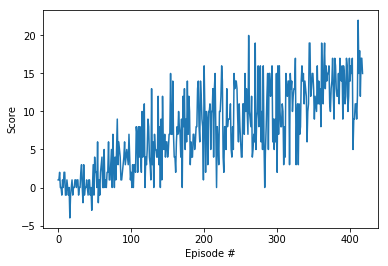

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('dqn_scores.png', bbox_inches='tight')
plt.show()

### 5. Watch a trained model in action

Choose the checkpoint to load as per the variant of DQN used. If the original DQN is used without any changes,
load the checkpoint `dqn.pth`, for Double DQN use `ddqn.pth`

In [17]:
agent.qnetwork_local.load_state_dict(torch.load('dqn.pth'))

In [18]:
env_info = env.reset(train_mode=False)[brain_name] 
state = env_info.vector_observations[0]            
score = 0                                         
while True:
    action = agent.act(state)
    
    env_info = env.step(action)[brain_name]       
    next_state = env_info.vector_observations[0]
    
    reward = env_info.rewards[0]                   
    done = env_info.local_done[0]
    
    score += reward                                
    state = next_state                            
    if done:                                      
        break
    
print("Score: {}".format(score))

Score: 13.0


When finished, you can close the environment.

In [ ]:
env.close()